The problem is to classify the pictures of men and women. The dataset has been downloaded from kaggle
https://www.kaggle.com/playlist/men-women-classification.

## Importing libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
import keras 

Using TensorFlow backend.


In [23]:
## keras imports
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

## Initializing the convolutional network

In [4]:
classifier=Sequential()

The classification is done using a network which has a convolution layer followed by max pooling, another convolution layer and max pooling layer. Then it is flattened into a single dimensional vector using flatten and we deepen the network by adding another fully connected layer which is concluded by the output layer.

## Addition of layers to the network

In [4]:
## Adding layers
classifier.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Convolution2D(64,(3,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [5]:
## Flattening the feature map to a single column vector
classifier.add(Flatten())

In [6]:
## Addition of fully connected layers 
classifier.add(Dense(units=128,activation='relu'))

In [7]:
## Addition of the output layer
classifier.add(Dense(units=1,activation='sigmoid'))

## Compiling the model

To address this problem, Adam optimization is used. Since it is a binary classification problem the loss is set as binary cross entropy loss. The metrics is accuracy.

In [8]:
#compiling the network
## Binary cross entropy is used to calculate the loss
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
from keras.preprocessing.image import ImageDataGenerator

Since the dataset is small we try to augment the data. Initially 1000 images of men and 1912 of women were present in the training data and in the test data 418 images of men and 915 images of women were present. The data is augmented so as to increase the training data

In [10]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
training_set = train_datagen.flow_from_directory(
        r"C:\Users\Akshaya\Desktop\python-great lakes\NN and Deep Learning\traindata\traindata",
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 2891 images belonging to 2 classes.


In [12]:
test_set = test_datagen.flow_from_directory(
        r"C:\Users\Akshaya\Desktop\python-great lakes\NN and Deep Learning\testdata\testdata",
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 1330 images belonging to 2 classes.


## Fitting the model to our dataset

The model is fit to our dataset , the weights are updated using full batch gradient descent. An epoch size of 10 is taken.

In [14]:
## The model is fit the augmented data.
classifier.fit_generator(
        training_set,
        steps_per_epoch=2891,
        epochs=10,
        validation_data=test_set,
        validation_steps=1330)

Epoch 1/10
2891/2891 [==============================] - 3109s 1s/step - loss: 0.3943 - accuracy: 0.8104 - val_loss: 0.2792 - val_accuracy: 0.8458
Epoch 2/10
2891/2891 [==============================] - 3102s 1s/step - loss: 0.1094 - accuracy: 0.9597 - val_loss: 0.6588 - val_accuracy: 0.8519
Epoch 3/10
2891/2891 [==============================] - 3861s 1s/step - loss: 0.0470 - accuracy: 0.9844 - val_loss: 1.1493 - val_accuracy: 0.8609
Epoch 4/10
2891/2891 [==============================] - 3764s 1s/step - loss: 0.0329 - accuracy: 0.9891 - val_loss: 0.5541 - val_accuracy: 0.8745
Epoch 5/10
2891/2891 [==============================] - 3555s 1s/step - loss: 0.0266 - accuracy: 0.9913 - val_loss: 2.4340 - val_accuracy: 0.8797
Epoch 6/10
2891/2891 [==============================] - 6003s 2s/step - loss: 0.0219 - accuracy: 0.9928 - val_loss: 1.1405 - val_accuracy: 0.8812
Epoch 7/10
2890/2891 [============================>.] - ETA: 1s - loss: 0.0176 - accuracy: 0.9943

C:\Users\Akshaya\Anaconda3\lib\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 23 could not be retrieved. It could be because a worker has died.
  UserWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 24 could not be retrieved. It could be because a worker has died.
  UserWarning)


2891/2891 [==============================] - 25865s 9s/step - loss: 0.0176 - accuracy: 0.9943 - val_loss: 1.2844 - val_accuracy: 0.8495
Epoch 8/10
2891/2891 [==============================] - 3858s 1s/step - loss: 0.0177 - accuracy: 0.9943 - val_loss: 4.4719 - val_accuracy: 0.8564
Epoch 9/10
2891/2891 [==============================] - 3937s 1s/step - loss: 0.0148 - accuracy: 0.9951 - val_loss: 2.5369 - val_accuracy: 0.8675
Epoch 10/10
2891/2891 [==============================] - 3240s 1s/step - loss: 0.0150 - accuracy: 0.9954 - val_loss: 1.6130 - val_accuracy: 0.8571


### The base model is overfitting. We try to apply dropout regularisation 

Dropout regularisation makes sure during the training not all the neurons are used. In our case 20% of the total number of neurons is dropped. But during testing all the neurons are used.

In [6]:
## Adding layers
classifier.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Convolution2D(64,(3,3),activation='relu'))
classifier.add(Dropout(0.20))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dropout(0.20))

In [7]:
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dense(units=1,activation='sigmoid'))

In [8]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
from keras.preprocessing.image import ImageDataGenerator

In [10]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
training_set = train_datagen.flow_from_directory(
        r"C:\Users\Akshaya\Desktop\python-great lakes\NN and Deep Learning\traindata\traindata",
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 2891 images belonging to 2 classes.


In [12]:
test_set = test_datagen.flow_from_directory(
        r"C:\Users\Akshaya\Desktop\python-great lakes\NN and Deep Learning\testdata\testdata",
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 1330 images belonging to 2 classes.


In [33]:
result=classifier.fit_generator(
        training_set,
        steps_per_epoch=2891,
        epochs=15,
        validation_data=test_set,
        validation_steps=1330)

Epoch 1/15
2891/2891 [==============================] - 3304s 1s/step - loss: 0.0167 - accuracy: 0.9947 - val_loss: 0.2488 - val_accuracy: 0.8586
Epoch 2/15
2891/2891 [==============================] - 3353s 1s/step - loss: 0.0172 - accuracy: 0.9947 - val_loss: 0.0982 - val_accuracy: 0.8925
Epoch 3/15
2891/2891 [==============================] - 3204s 1s/step - loss: 0.0153 - accuracy: 0.9951 - val_loss: 0.1078 - val_accuracy: 0.8686
Epoch 4/15
2891/2891 [==============================] - 3161s 1s/step - loss: 0.0143 - accuracy: 0.9954 - val_loss: 1.1983 - val_accuracy: 0.8818
Epoch 5/15
2891/2891 [==============================] - 3114s 1s/step - loss: 0.0141 - accuracy: 0.9955 - val_loss: 0.3807 - val_accuracy: 0.9053
Epoch 6/15
2891/2891 [==============================] - 3411s 1s/step - loss: 0.0125 - accuracy: 0.9959 - val_loss: 1.3503 - val_accuracy: 0.8902
Epoch 7/15
2891/2891 [==============================] - 3901s 1s/step - loss: 0.0129 - accuracy: 0.9959 - val_loss: 0.1074 -

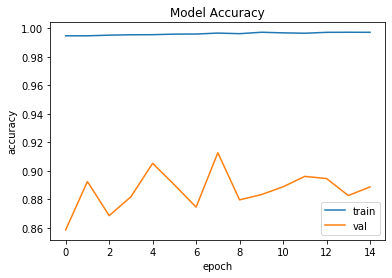

In [36]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc=0)
plt.show()

The model is still overfitting. We can overcome this problem by using different values for dropout or even a  different type of regularisation. We can also get and train on more data. The other solution is to change the architecture of the neural network.

## Model Summary

In [35]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 29, 29, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12544)            

In [42]:
## For more predictions :
test_image=image.load_img('',target_size=(64,64)) #load image for predicting
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict(test_image)

In [43]:
training_set.class_indices

{'men': 0, 'women': 1}

In [45]:
## Using the prediction we can identify if the loaded image is that of a man or woman